<a href="https://colab.research.google.com/github/jwlee95/DSP_Class2024/blob/main/Ch03_%E1%84%8B%E1%85%B5%E1%84%89%E1%85%A1%E1%86%AB%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%AB%E1%84%89%E1%85%B5%E1%86%AB%E1%84%92%E1%85%A9%E1%84%8B%E1%85%AA_%E1%84%89%E1%85%B5%E1%84%89%E1%85%B3%E1%84%90%E1%85%A6%E1%86%B72_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3장: 이산시간신호와 시스템

In [2]:
# 필요한 python package를 불러옴.......
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## chap03_basic_sequences (이산신호의 기본 신호들...)

### 3-1 기본 이산신호

In [4]:
# 이산시간 신호의 구성 : python의 lambda 함수를 활용하여 원하는 샘플 시퀀스를 표현함
#  xn=[3,3,5,5,4,3,2,1]  # 샘플시퀀스
#(a) 신호 정의
x = lambda n: 3*((n==0)|(n==1)).astype(float) + 5*((n==2)|(n==3)).astype(float) \
            + 4*(n==4).astype(float) + 3*(n==5).astype(float) \
            + 2*(n==6).astype(float) + 1*(n==7).astype(float)

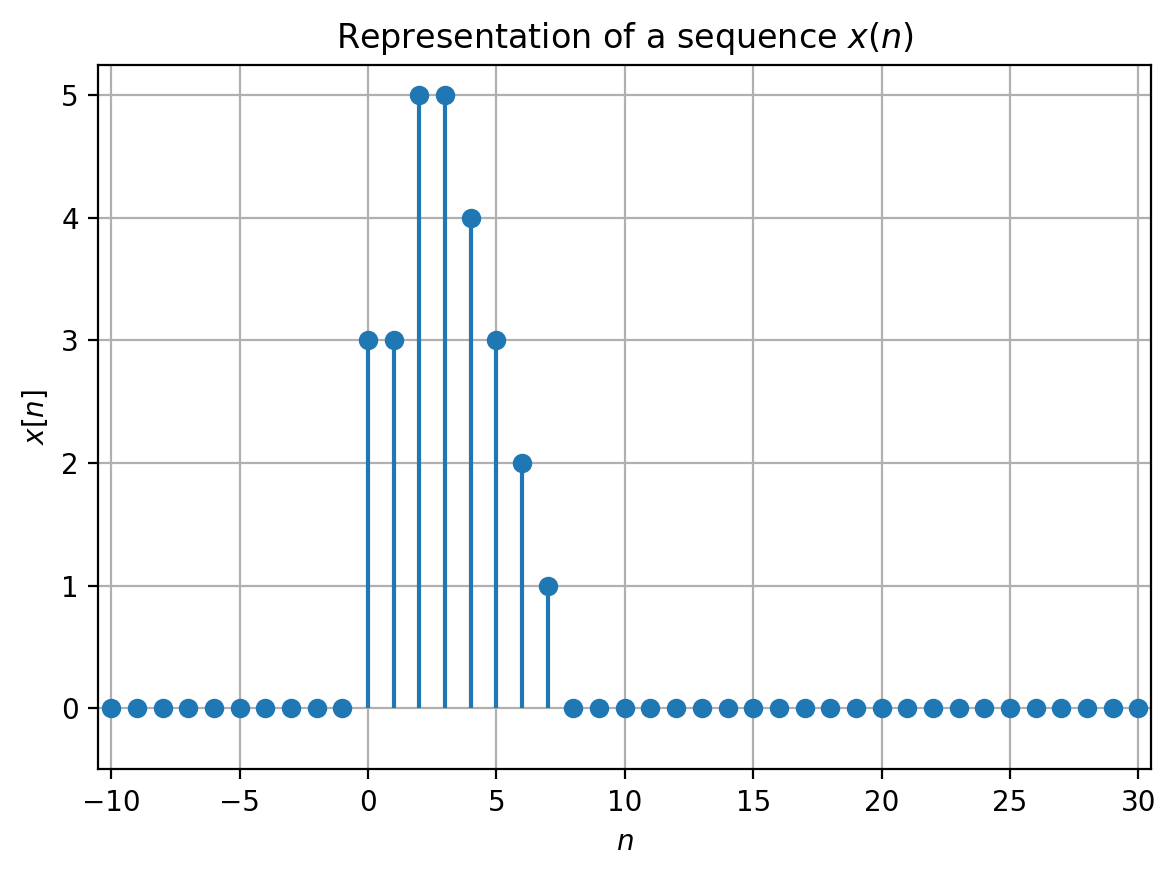

In [8]:
#(b) 이산시간 신호의 스템 플롯
nmin, nmax = -10, 30
n = np.arange(nmin, nmax+1)
fig, ax = plt.subplots(figsize=(6,4.5)); ax.grid()
ax.stem(n, x(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax.set_title("Representation of a sequence $x(n)$")     #그래프 제목
#ax.set_xlim(-5.5, 10.5)
ax.set_xlim(nmin-0.5, nmax+ 0.5)
ax.set_ylim(-0.5, )
ax.set_xlabel('$n$')  #x축, y축 이름
ax.set_ylabel("$x[n]$")
fig.tight_layout()

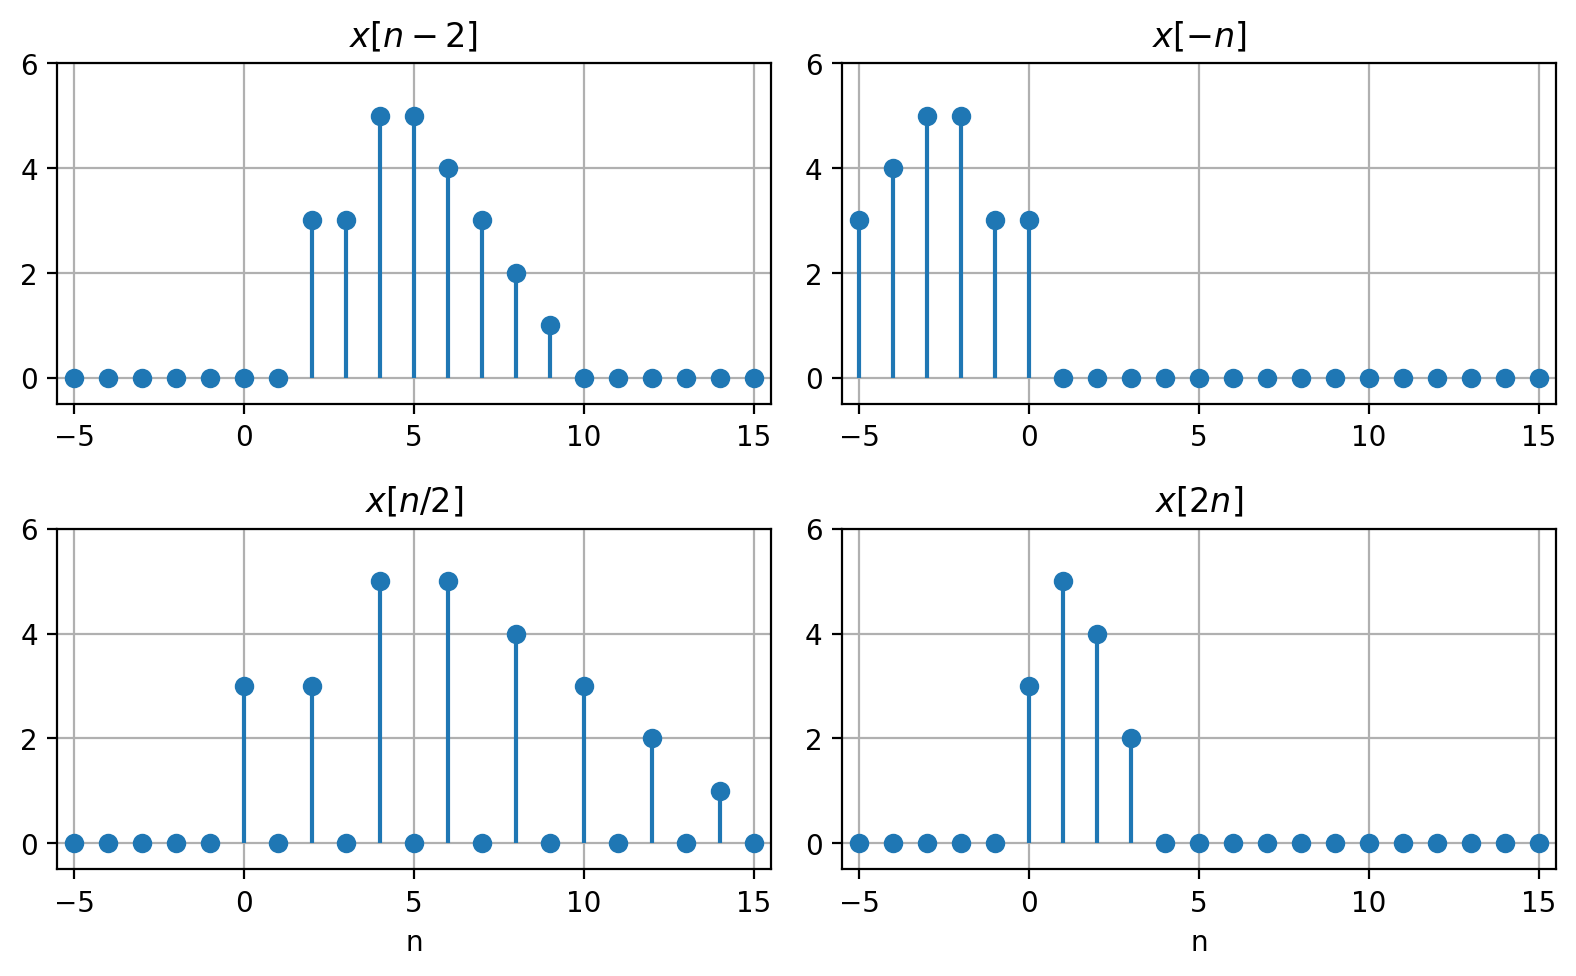

In [ ]:
#(c) 이산시간 신호의 시간 의존적 변형

#  xn=[3,3,5,5,4,3,2,1]  # 샘플시퀀스

nmin, nmax = -20, 20
n = np.arange(nmin, nmax+1)

# 스템 플롯
fig, axes = plt.subplots(2,2, figsize=(8,5))
# x[n-2]: 2 샘플 지연
axes[0,0].stem(n, x(n-2), basefmt=' ')
axes[0,0].grid()
axes[0,0].set_xlim(-5.5,15.5)
axes[0,0].set_ylim(-0.5,6)
axes[0,0].set_title('$x[n-2]$')

# x[-n]: 시간 반전
axes[0,1].stem(n, x(-n), basefmt=' '); axes[0,1].grid()
axes[0,1].set_xlim(-5.5,15.5); axes[0,1].set_ylim(-0.5,6); axes[0,1].set_title('$x[-n]$')

# x[n/2]: 시간 2배 확장
axes[1,0].stem(n, x(n/2), basefmt=' '); axes[1,0].grid()
axes[1,0].set_xlim(-5.5,15.5); axes[1,0].set_ylim(-0.5,6); axes[1,0].set_title('$x[n/2]$')
axes[1,0].set_xlabel('n')

# x[2n]: 시간 2배 압축
axes[1,1].stem(n, x(2*n), basefmt=' '); axes[1,1].grid()
axes[1,1].set_xlim(-5.5,15.5); axes[1,1].set_ylim(-0.5,6); axes[1,1].set_title('$x[2n]$')
axes[1,1].set_xlabel('n')
fig.tight_layout()

### 3-2 단위샘플 (`Unit Sample`) 시퀀스 (`sequence`)  

$$ \delta[n] = \left\{\begin{align}
1,& \;\; n=0 \\
0,& \;\; n \ne 0
\end{align}\right. \Rightarrow
\;\;\; \delta[n] = \{ \dots ,0,0,\underset{*}{1},0,0, \dots \}
$$

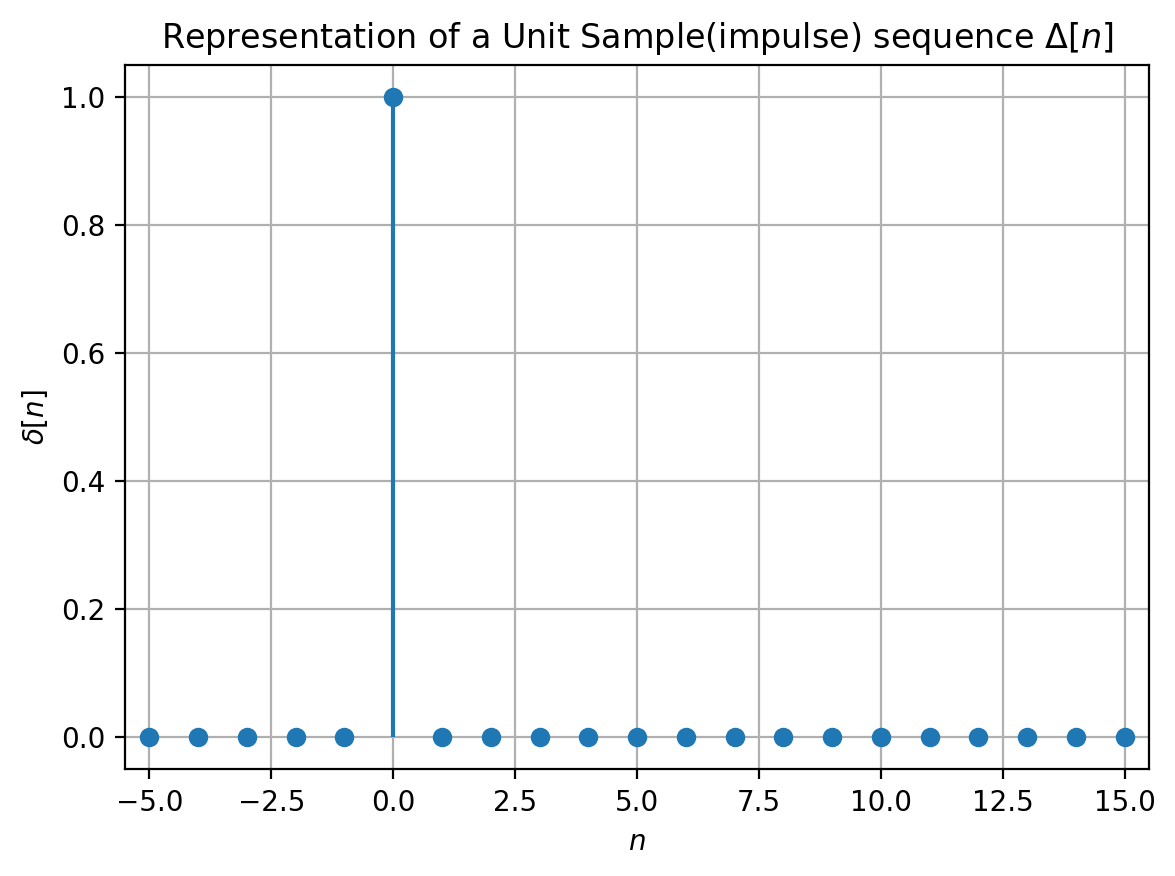

In [ ]:
# 신호 생성
imp = lambda n: (n==0)*(n==np.round(n)).astype(float)# 임펄스

nmin, nmax = -5, 15
n = np.arange(nmin, nmax+1)
fig, ax = plt.subplots(figsize=(6,4.5))
ax.grid()
ax.stem(n, imp(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax.set_title("Representation of a Unit Sample(impulse) sequence $\delta [n]$")     #그래프 제목
#ax.set_xlim(-5.5, 10.5)
ax.set_xlim(nmin-0.5, nmax+ 0.5)
#ax.set_ylim(-0.5, )
ax.set_xlabel('$n$')  #x축, y축 이름
ax.set_ylabel("$\delta[n]$")
fig.tight_layout()

### 3-3 단위계단 (`Unit Step`) 시퀀스 (`sequence`)  

$$ u[n] = \left\{\begin{align}
1,& \;\; n \ge 0 \\
0,& \;\; n \le 0
\end{align}\right. \Rightarrow
\;\;\; u[n] = \{ \dots ,0,0,\underset{*}{1},1,1, \dots \}
$$  


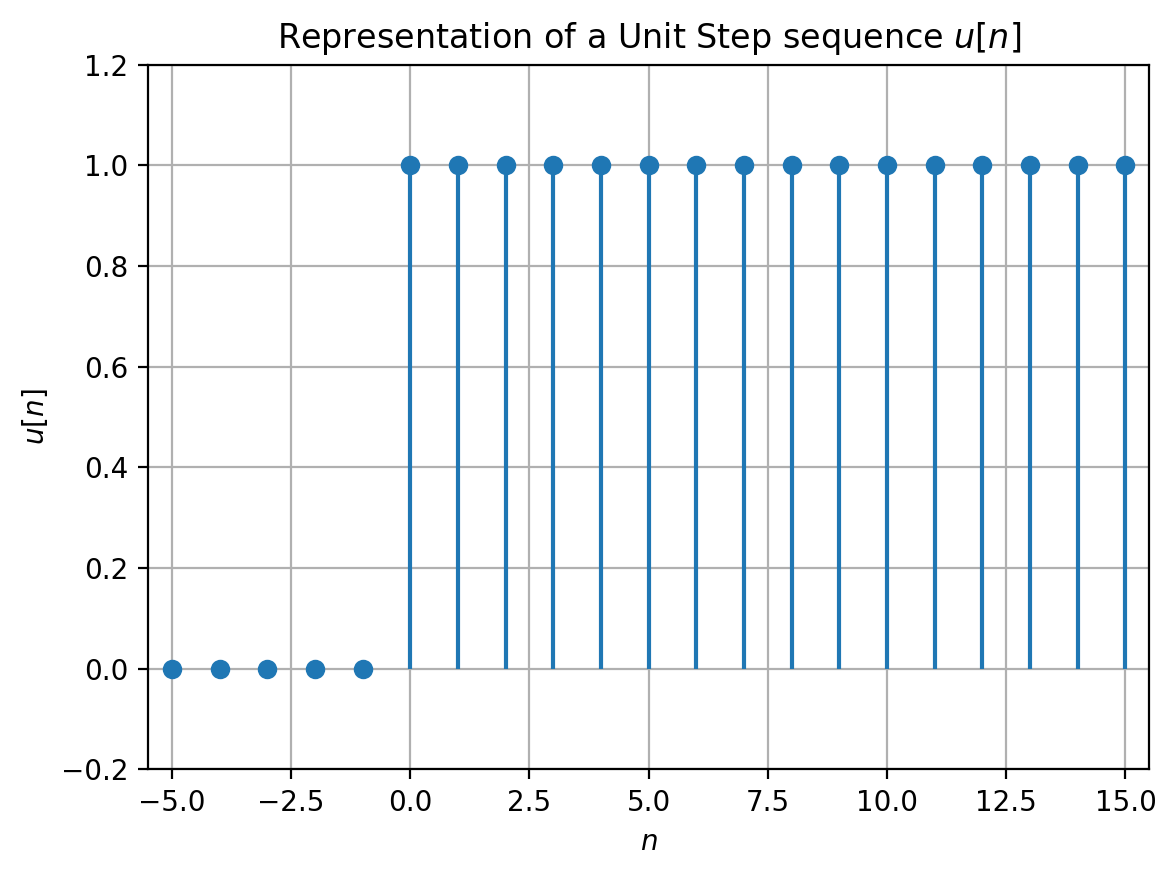

In [11]:
# 신호 생성
u = lambda n: (n>=0)*(n==np.round(n)).astype(float)   # 계단

nmin, nmax = -5, 15
n = np.arange(nmin, nmax+1)
fig, ax = plt.subplots(figsize=(6,4.5))
ax.grid()
ax.stem(n, u(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax.set_title("Representation of a Unit Step sequence $u[n]$")     #그래프 제목
ax.set_xlim(nmin-0.5, nmax+ 0.5)
ax.set_ylim(-0.2,1.2 )
ax.set_xlabel('$n$')  #x축, y축 이름
ax.set_ylabel("$u[n]$")
fig.tight_layout()

### 3-4 실수지수(`Real-valued Exponential`) 시퀀스 (`sequence`)  

$$ x[n] = a^n, \;\;\; \forall n; \;n \in \mathbb{R}
$$

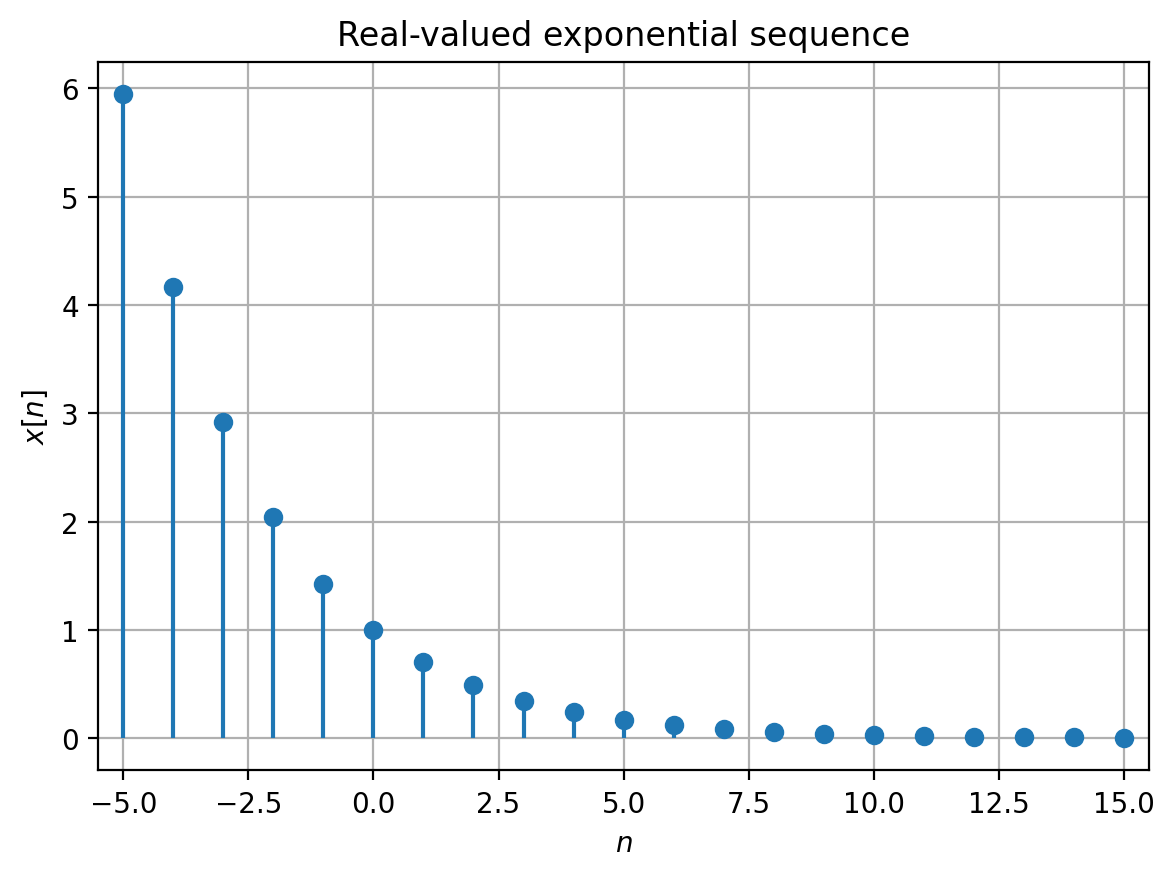

In [ ]:
# 신호 생성
a=0.7
ex = lambda n: np.power(a,n)   # #실수지수

nmin, nmax = -5, 15
n = np.arange(nmin, nmax+1)
fig, ax = plt.subplots(figsize=(6,4.5))
ax.grid()
ax.stem(n, ex(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax.set_title("Real-valued exponential sequence")     #그래프 제목
ax.set_xlim(nmin-0.5, nmax+ 0.5)
#ax.set_ylim(-0.5, )
ax.set_xlabel('$n$')  #x축, y축 이름
ax.set_ylabel("$x[n]$")
fig.tight_layout()

### 3-5 복소지수(`Complex-valued Exponential`) 시퀀스 (`sequence`)  

$$ x[n] = e^{(\sigma + j\omega )n}, \;\;\; \forall n
$$

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


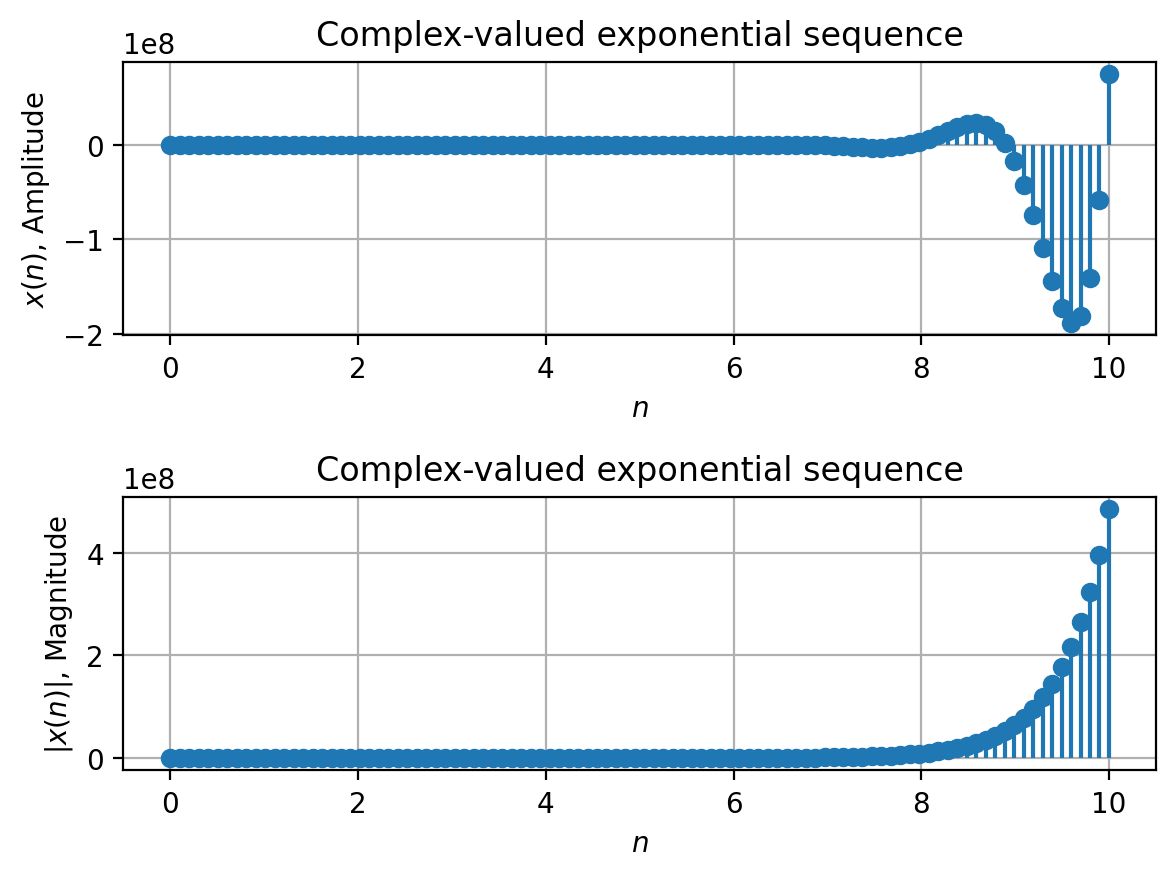

In [12]:
# 신호 생성
sigma=2; freq=3
ex2 = lambda n: np.exp((sigma+freq*1j)*n)        # 복소지수시퀀스 (amplitude)
magxn = lambda n: abs(np.exp((sigma+freq*1j)*n)) # 절대값 복소지수시퀀스 (magnitude)

nmin, nmax = 0, 10
#n = np.arange(nmin, nmax+1)
n=np.linspace(0,10,100)     #순서시퀀스

fig, ax = plt.subplots(2,1, figsize=(6,4.5))
ax[0].stem(n, ex2(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax[0].grid()
ax[0].set_title("Complex-valued exponential sequence")     #그래프 제목
ax[0].set_xlim(nmin-0.5, nmax+ 0.5)
ax[0].set_xlabel('$n$')  #x축, y축 이름
ax[0].set_ylabel("$x(n)$, Amplitude")

ax[1].stem(n, magxn(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax[1].grid()
ax[1].set_title("Complex-valued exponential sequence")     #그래프 제목
ax[1].set_xlim(nmin-0.5, nmax+ 0.5)
ax[1].set_xlabel('$n$')  #x축, y축 이름
ax[1].set_ylabel("$|x(n)|$, Magnitude")
fig.tight_layout()

### 3-6 정현파(`Sinusoidal`) 시퀀스 (`sequence`)  

$$ x[n] = A\cos( \omega n + \phi ), \;\;\; \forall n
$$

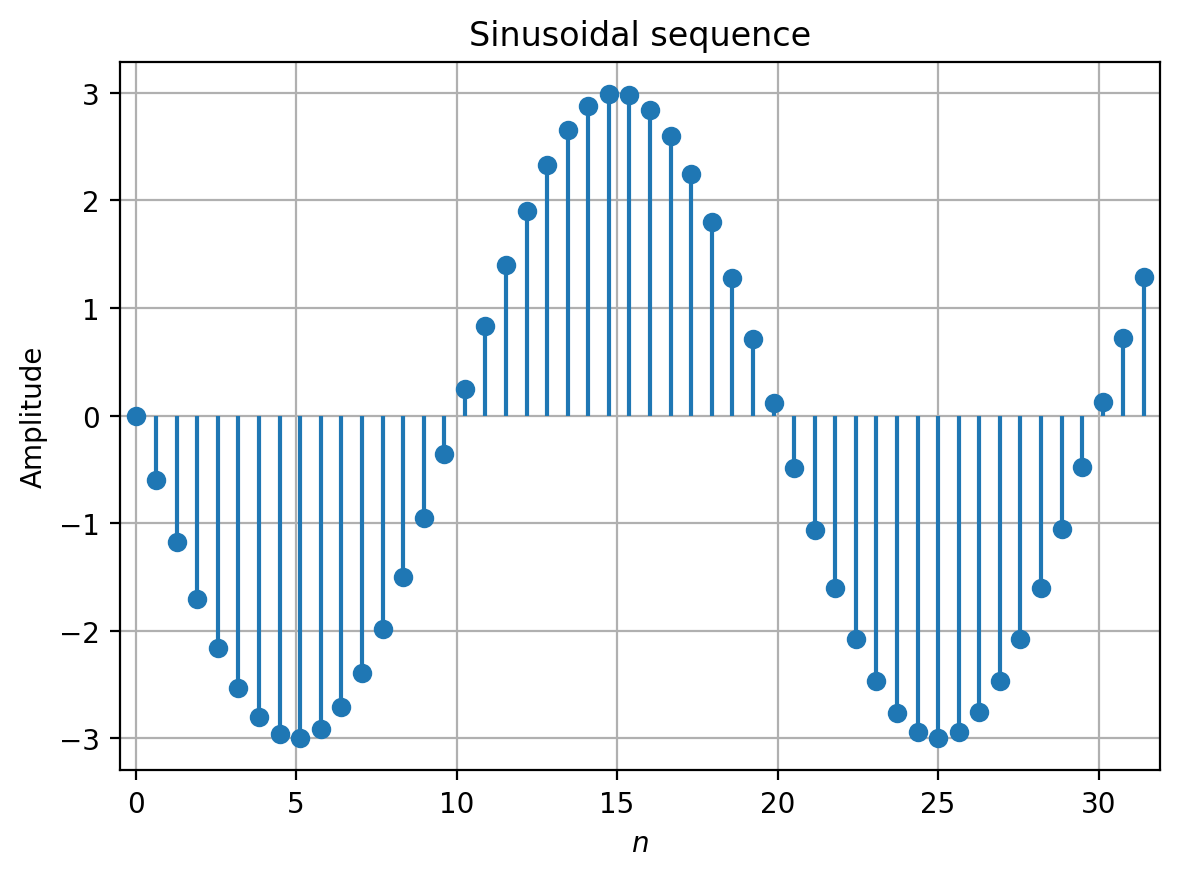

In [13]:
# 신호 생성

xn = lambda n: 3*np.cos(0.1*np.pi*n+np.pi/2)  #정현파 시퀀스

nmin, nmax = 0, 10*np.pi
#n = np.arange(nmin, nmax+1)
n=np.linspace(0,10*np.pi,50)     #순서시퀀스, 0부터 10*pi까지 100등분, 0.1pi씩

fig, ax = plt.subplots(figsize=(6,4.5))
ax.grid()
ax.stem(n, xn(n), basefmt=' ')  # Lambda 함수를 이용한 함수 처리를 주의할 것!.........
ax.set_title("Sinusoidal sequence")     #그래프 제목
ax.set_xlim(nmin-0.5, nmax+ 0.5)
#ax.set_ylim(-0.5, )
ax.set_xlabel('$n$')  #x축, y축 이름
ax.set_ylabel("Amplitude")
fig.tight_layout()

### 3-7 랜덤(`Random`) 시퀀스 (`sequence`)  

- "무작위" (?)
> `np.random.rand()` 함수  
>  - `rand()` : 0부터 1사이의 균일분포를 가지는 난수 발생  
>  - `randn()` : 표준편차가 1인 가우시안 표준전규분포를 가지는 난수 발생  
>  - `randint()` : 균일분포의 정수 난수 발생


Text(0.5, 1.0, 'Random sequence')

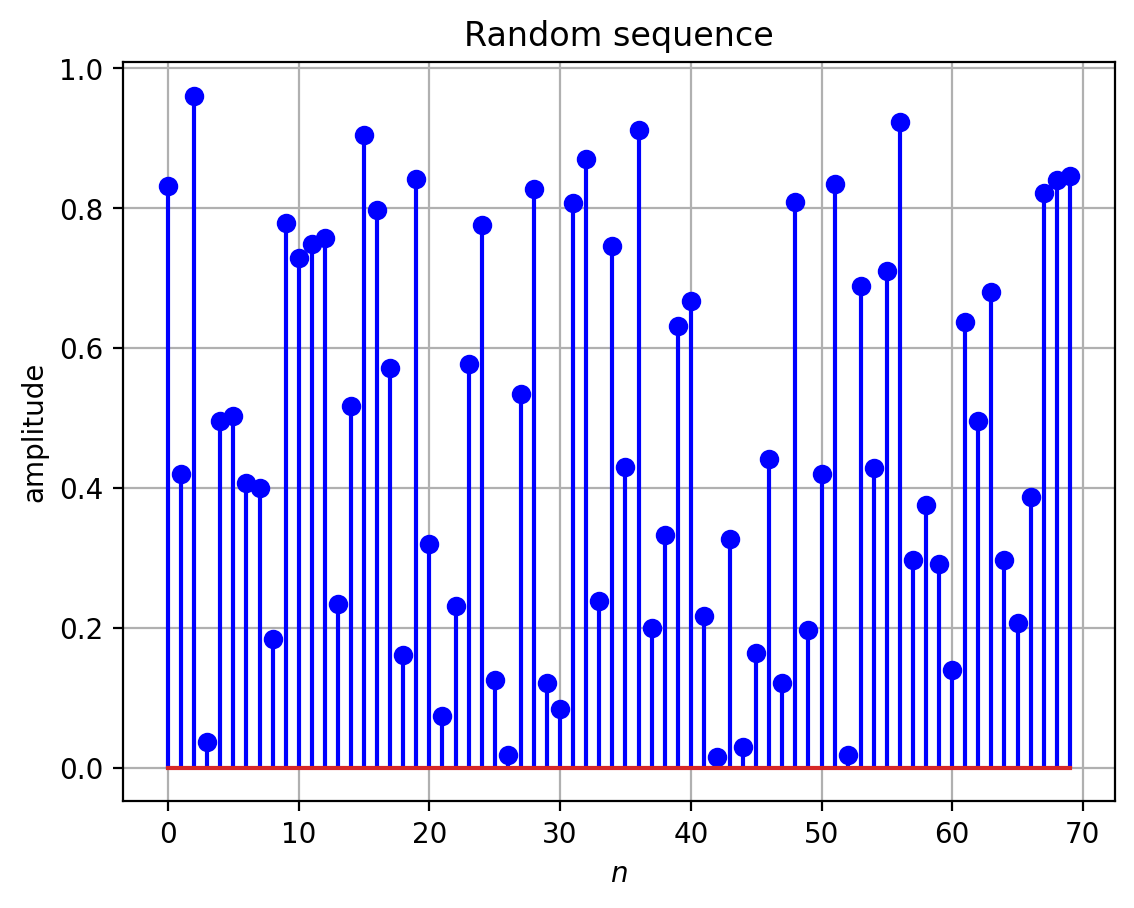

In [14]:
xn = lambda n: np.random.rand(70)  # 랜덤 샘플 시퀀스

# xn=np.random.rand(20); print("Random sequence x(n)=",xn)  #무작위샘플시퀀스

plt.figure(7)
n=np.arange(70)
plt.stem(n,xn(n),"blue"); plt.grid()   #그리기, 눈금그리기
plt.xlabel("$n$"); plt.ylabel("amplitude")     #x축, y축 이름
plt.title("Random sequence")     #그래프 제목

### 3-8 주기(`Periodic`) 시퀀스 (`sequence`)  

$$ x[n] = x[n+T], \;\;\; \forall n
$$

x= [1, 2, 3, 4, 5, 6, 7]
xn= [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]


Text(0.5, 1.0, '$\\it{Peoriodic \\;sequence}$')

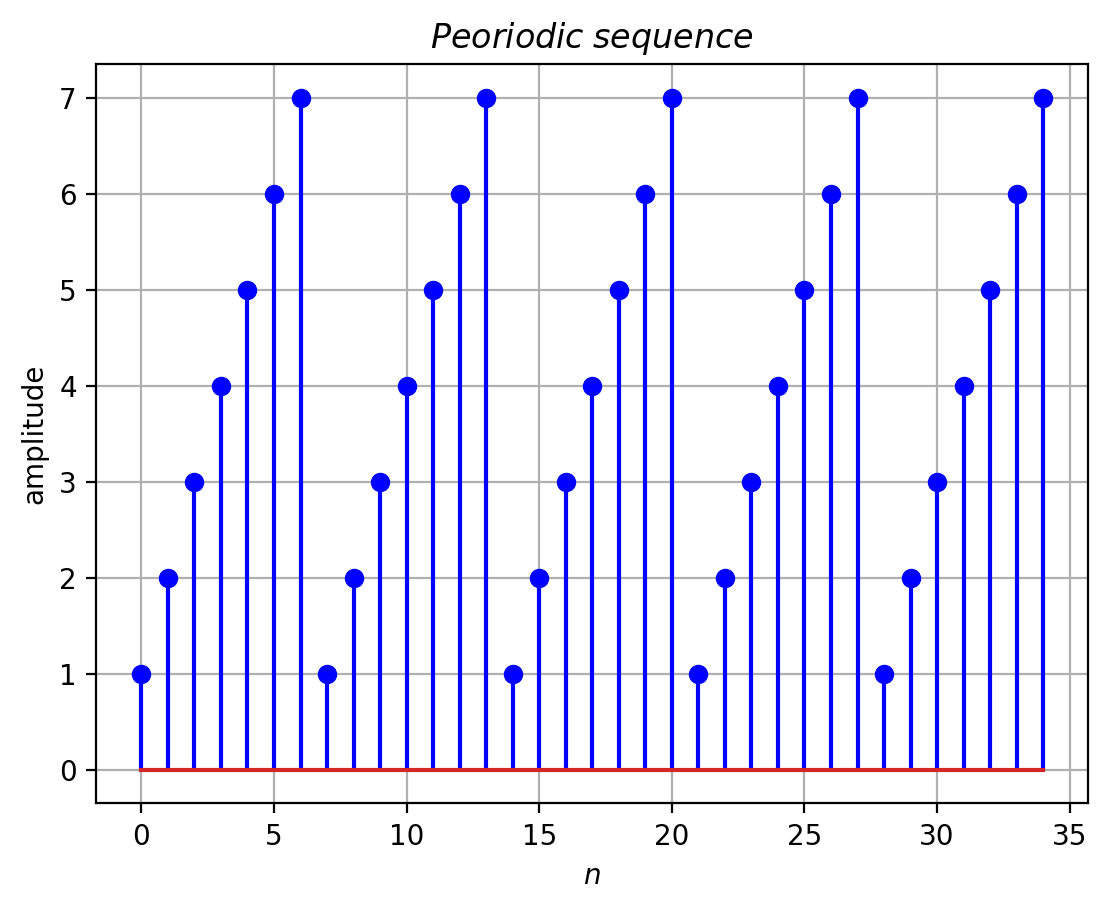

In [ ]:
x=[1,2,3,4,5,6,7]; print("x=",x)   #샘플시퀀스
xn=5*x; print("xn=",xn)     #시퀀스 5회 복사
plt.figure(8)
n=np.arange(35)   #순서시퀀스
plt.stem(n,xn,"blue"); plt.grid()   #그리기, 눈금그리기
plt.xlabel("$n$"); plt.ylabel("amplitude")     #x축, y축 이름
plt.title('$\it{Peoriodic \;sequence}$')     #그래프 제목


## 3.3 이산신호의 연산  

---
###  Ex3-1:   
다음의 시퀀스들을 각각의 지정된 구간에 대해 발생시키고 그래프로 나타내시오.  

$a. x[n] = 2 \delta[n+2] - \delta [n-4], \;\; -5 \le n \le 5 $  
$b. x[n]=n(u[n]-u[n-10])+10e^{-0.3(n-10)}(u[n-10]-u[n-20]), \;\; 0 \le n \le 20$  
$c. x[n] = \cos(0.04\pi n) + 0.2 \omega(n), \;\; 0 \le n \le 20$  
  여기서 $\omega(n)$은 평균이 0이고, 분산이 1인 가우시안 랜덤 시퀀스   
$d. \tilde{x}[n]=\{\dots,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,\dots  \},\;\; -10 \le n \le 9$


In [ ]:
n=np.arange(-5,6)
xn=2*impseq(-2,-5,5)-impseq(4,-5,5)
plt.subplot(4,1,1); plt.stem(n,xn,"blue"); plt.grid(); plt.ylabel("a: x(n)")

n=np.arange(0,21)
xn1=n*(stepseq(0,0,20)-stepseq(10,0,20))
xn2=10*np.exp(-0.3*(n-10))*(stepseq(10,0,20)-stepseq(20,0,20))
xn=xn1+xn2
plt.subplot(4,1,2); plt.stem(n,xn,"blue"); plt.grid(); plt.ylabel("b: x(n)")

n=np.arange(0,51)
xn=np.cos(0.04*np.pi*n)+0.2*np.random.rand(len(n))
plt.subplot(4,1,3); plt.stem(n,xn,"blue"); plt.grid(); plt.ylabel("c: x(n)")

n=np.arange(-10,10)
x=[5,4,3,2,1]
xn=4*x
plt.subplot(4,1,4); plt.stem(n,xn,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("d: x(n)")

### Ex3-2:  
 시퀀스 $x[n]$가 다음과 같을때, 문제의 시퀀스들을 발생시키고, 그래프로 그리시오.   

$$x[n]=\{1,2,\underset{*}{3},4,5,6,7,6,5,4,3,2,1 \} $$  

$a. x_1[n] = 2 x[n-5] - 3 x[n+4]$  
$b. x_2[n] = x[3-n] + x[n]x[n+4]$  


In [ ]:
n=np.arange(-2,11)
x=np.array([1,2,3,4,5,6,7,6,5,4,3,2,1])

n11,x11=sigshift(n,x,5); print(n11,x11)
n12,x12=sigshift(n,x,-4); print(n12,x12)

n1,x1,y1,y2=sigadd(n11,2*x11,n12,-3*x12)
plt.subplot(2,1,1); plt.stem(n1,x1,"blue"); plt.grid(); plt.ylabel("$x_1[n]$")
plt.title("Sequences of Example 3-2, a, b")

n21,x21=sigfold(n,x)
n21,x21=sigshift(n21,x21,3)
n22,x22=sigshift(n,x,-4)
n22,x22,y1,y2=sigmult(n,x,n22,x22)

n2,x2,y1,y2=sigadd(n21,x21,n22,x22)
plt.subplot(2,1,2); plt.stem(n2,x2,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("$x_2[n]$")

### Ex3-3:  
다음과 같은 복서 시퀀스 $x[n]$을 발생시키고, 크기, 실수부분, 허수부분, 그리고 위상을 그리시오.  

$$x[n] = e^{(-0.1+j0.3)n}, \;\; -10 \le n \le 10
$$

In [ ]:
#import numpy as np
#import matplotlib.pylab as plt

n=np.arange(-10,11)
alpha=-0.1+0.3*1j
x=np.exp(alpha*n)

plt.subplot(4,1,1); plt.stem(n,np.real(x),"blue")
plt.grid(); plt.ylabel("Real part")
plt.title("Four parts of sequence x(n)")
plt.subplot(4,1,2); plt.stem(n,np.imag(x),"blue")
plt.grid(); plt.ylabel("Imaginary part")
plt.subplot(4,1,3); plt.stem(n,np.abs(x),"blue")
plt.grid(); plt.ylabel("Magnitude part")
plt.subplot(4,1,4); plt.stem(n,np.angle(x)*180/np.pi,"blue")
plt.grid(); plt.ylabel("Phase part"); plt.xlabel("n")



### Ex3-4:  
다음과 같은 시퀀스 $x[n]$이 있다. 우함수 성분과 기함수 상분으로 분해하시오.  
$$ x[n] = u[n] - u[n-11]
$$   

---
- 우함수(`Even function`) $x_e [n]$ : $x_e [-n] = x_e [n]$   
- 기함수(`Odd function`) $x_o [n]$ : $x_o [-n] = -x_o [n]$  

$$ x[n] = x_e [n] + x_o [n] \\
\therefore  x_e [n] = \frac{1}{2} \left[  x[n] + x[-n] \right] \\
x_o [n] = \frac{1}{2} \left[  x[n] - x[-n] \right]
$$



In [ ]:
n=np.arange(-10,11)
x=stepseq(0,-10,10)
n,xe,xo=evenodd(n,x)

plt.subplot(3,1,1); plt.stem(n,x,"blue")
plt.grid(); plt.ylabel("x(n)")
plt.title("Even-Odd decomposition of Sequence $x[n]$")
plt.subplot(3,1,2); plt.stem(n,xe,"blue")
plt.grid(); plt.ylabel("$x_e [n]$")
plt.subplot(3,1,3); plt.stem(n,xo,"blue")
plt.grid(); plt.xlabel("n"); plt.ylabel("$x_o [n]$")

### Ex3-5:   

입력 $x[n]$과 임펄스응답 $h[n]$가 다음과 같은 LTI시슽템의 출력 $y[n]$을 중첩 합의 형식을 사용해서 결정하시오.   

$$x[n]=\{1,\underset{*}{1},1/2 \} \;\;\; h[n]=\{\underset{*}{1},1/2, 1/4 \}$$  

In [ ]:
n=np.arange(-2,5)  #순서시퀀스
N=len(n)  #시퀀스 길이
xn=np.zeros(N); xn[1]=1; xn[2]=1; xn[3]=0.5  #x(n)
hn=np.zeros(N); hn[2]=1; hn[3]=0.5; hn[4]=0.25  #h(n)
yn=np.zeros(N)  #y(n)

for i in range(N):
    if xn[i]!=0:  #x(n)의 값이 있으면
        print("n=",i)
        for k in range(3):
            yn[i+k]=yn[i+k]+xn[i]*hn[2+k]  #y(n)에 순서대로 더한다.
        print("y(n)=",yn)

plt.subplot(1,2,1); plt.stem(n,xn,"blue")
plt.grid(); plt.ylabel("x(n)")
plt.title("Sequence $x[n]$")
plt.subplot(1,2,2); plt.stem(n,hn,"blue")
plt.grid(); plt.ylabel("$h[n]$")
plt.title("Sequence $h[n]$")

### Ex3-6:   

입력 $x[n]$과 임펄스응답 $h[n]$가 다음과 같은 LTI시슽템의 출력 $y[n]$을 "곱의 합"의 형식을 사용해서 결정하시오.   

$$x[n]=\{3,11,7,\underset{*}{0},-1,4,2 \} \;\;\; h[n]=\{2,\underset{*}{3},0, -5,2,1 \}$$

In [ ]:
#import numpy as np

xn=[3,11,7,0,-1,4,2]; n1=[-3,-2,-1,0,1,2,3]
hn=[2,3,0,-5,2,1]; n2=[-1,0,1,2,3,4]

nmin=min(n1)+min(n2)  #컨볼루션 연산의 시작 순서
nmax=max(n1)+max(n2)  #컨볼루션 연산의 끝 순서
n=np.arange(nmin,nmax+1)  #출력 y(n)의 순서시퀀스
N=len(n)  #출력 시퀀스의 길이
yn=np.zeros(N)  #출력 시퀀스 어레이 설정

for i in range(nmin,nmax+1):  #n의 시작부터 끝까지
    sum=0
    for j in range(min(n1),max(n1)+1):  #k의 시작부터 끝까지
        if ((i-j)>=min(n2) and (i-j)<=max(n2)):  #(n-k)가 h(n)의 순서 내이면
            sum=sum+xn[j+abs(min(n1))]*hn[i-j+abs(min(n2))]  #컨볼루션 연산
    yn[i+abs(nmin)]=sum  #출력 처장

print("x(n)=",xn)
print("h(n)=",hn)
print("y(n)=",yn)

plt.subplot(3,1,1); plt.stem(n1,xn,"blue")
plt.grid(); plt.ylabel("x(n)")
#plt.title("Sequence $x[n]$")
plt.subplot(3,1,2); plt.stem(n2,hn,"blue")
plt.grid(); plt.ylabel("$h[n]$")
#plt.title("Sequence $h[n]$")
plt.subplot(3,1,3); plt.stem(n,yn,"blue")
plt.grid(); plt.ylabel("$y[n]$")
#plt.title("Sequence $h[n]$")

### Ex3-7:   

입력 $x[n]$과 임펄스응답 $h[n]$가 다음과 같은 LTI시슽템의 출력 $y[n]$을 "반전-이동" 형식을 사용해서 결정하시오.   

$$x[n]=\{3,11,7,\underset{*}{0},-1,4,2 \} \;\;\; h[n]=\{2,\underset{*}{3},0, -5,2,1 \}$$

In [ ]:
xn=[3,11,7,0,-1,4,2]; n1=[-3,-2,-1,0,1,2,3] #x(n)과 순서시퀀스
hn=[2,3,0,-5,2,1]; n2=[-1,0,1,2,3,4]  #h(n)과 순서시퀀스
fn,fhn=sigfold(n2,hn)  #h(-n)과 순서시퀀스
print("x(n)=",xn," n1=",n1)
print("h(n)=",hn," n2=",n2)
print("h(-n)=",fhn," (-n2)=",fn)

nmin=min(n1)+min(n2)  #컨볼루션 연산의 시작 순서
nmax=max(n1)+max(n2)  #컨볼루션 연산의 끝 순서
n=np.arange(nmin,nmax+1)  #출력 y(n)의 순서시퀀스
N=len(n)  #출력 시퀀스의 길이
yn=np.zeros(N)  #출력 시퀀스 어레이 설정

for i in range(nmin,nmax+1):  #n의 시작부터 끝까지
    sum=0
    for j in range(int(min(fn)),int(max(fn)+1)):  #h(-n)의 시작부터 끝까지
        if ((i+j)>=min(n1) and (i+j)<=max(n1)):  #(n-k)가 x(n)의 순서 내이면
            sum=sum+xn[i+j+abs(min(n1))]*fhn[j+int(abs(min(fn)))]#컨볼루션 연산
    yn[i+abs(nmin)]=sum  #출력 처장

print("y(n)=",yn); print("n=",n)

### Ex3-8:   

입력 $x[n]$과 임펄스응답 $h[n]$가 다음과 같은 LTI시슽템의 출력 $y[n]$을 Numpy에서 제공하는 `convolution`함수를 사용해서 결정하시오.   

$$x[n]=\{3,11,7,\underset{*}{0},-1,4,2 \} \;\;\; h[n]=\{2,\underset{*}{3},0, -5,2,1 \}$$   



In [ ]:
nx=np.arange(-3,4)
nh=np.arange(-1,5)
xn=np.array([3,11,7,0,-1,4,2])
hn=np.array([2,3,0,-5,2,1])

n,y=convolve_m(nx,xn,nh,hn)
print("y(n)=x(n)*h(n)=",y); print("n=",n)

plt.subplot(3,1,1); plt.stem(nx,xn,"blue"); plt.grid()
plt.title("Convolution, y(n)=x(n)*h(n)"); plt.ylabel("x(n)"); plt.ylim(-2,12)
plt.subplot(3,1,2); plt.stem(nh,hn,"blue"); plt.grid()
plt.ylabel("h(n)"); plt.ylim(-6,5)
plt.subplot(3,1,3); plt.stem(n,y,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("y(n)")

## 3.6 차분방정식

### Ex3-9:   
다음과 같은 차분방정식에 대해,
$$ y[n] - y[n-1] + 0.9 y[n-2] = x[n], \;\; \forall n
$$

$a. n=0,\dots ,100$에서 임펄스 응답$ h[n]$을 계산하고 그래프로 나타내시오.  
$b. n=0,\dots ,100$에서 단위계단응답 $s[n]$을 계산하고 그래프로 나타내시오.  
$c.$ 임펄스 응답$ h[n]$으로 측정된 이 시스템이 안정한지 판단하시오.

In [ ]:
#import numpy as np
#import matplotlib.pylab as plt
from scipy import signal
#from chap03_module import *

b=[1]  #입력계수
a=[1,-1,0.9]  #출력계수

n=np.arange(100)  #순서시퀀스
xn1=impseq(0,0,99)  #단위임펄스 입력시퀀스
hn=signal.lfilter(b,a,xn1)  #임펄스응답시퀀스
plt.figure(1)
plt.subplot(2,1,1); plt.stem(n,xn1,"blue"); plt.grid(); plt.ylabel("x(n)")
plt.title("Impulse input x(n) and Impulse response h(n)")
plt.subplot(2,1,2); plt.stem(n,hn,"blue"); plt.grid(); plt.ylabel("h(n)")
plt.xlabel("n")

xn2=stepseq(0,0,99) #단위스텝 입력시퀀스
sn=signal.lfilter(b,a,xn2)  #단위스텝 응답시퀀스
plt.figure(2)
plt.subplot(2,1,1); plt.stem(n,xn2,"blue"); plt.grid(); plt.ylabel("x(n)")
plt.title("Unit step input x(n) and Unit step response s(n)")
plt.subplot(2,1,2); plt.stem(n,sn,"blue"); plt.grid(); plt.ylabel("s(n)")
plt.xlabel("n")

xn1_sum=np.sum(xn1); hn_sum=np.sum(hn)
sum1=hn_sum-xn1_sum; print("sum_of_unit impulse response=",sum1)
xn2_sum=np.sum(xn2); sn_sum=np.sum(sn)
sum2=sn_sum-xn2_sum; print("sum_of_unit step response=",sum2)



### Ex 3-10:   
다음과 같이 임펄스응답 $h[n]$이 무한구간인 시스템이 있다. 유한구간의 입력 $x[n]$에 대해 출력 $y[n]$을 구하시오.  
$$ x[n] = u[n] - u[n-10], \; h[n] = (0.9)^n u[n]
$$

In [ ]:
#import numpy as np
#import matplotlib.pylab as plt
#from scipy import signal
#from chap03_module import *

b=[1]  #입력계수
a=[1,-0.9]  #출력계수
n=np.arange(0,51)  #순서시퀀스
xn=stepseq(0,0,50)-stepseq(10,0,50)  #입력시퀀스
hn=np.power(0.9,n)  #임펄스응답시퀀스
yn=signal.lfilter(b,a,xn)  #출력시퀀스

plt.subplot(3,1,1); plt.stem(n,xn,"blue"); plt.grid(); plt.ylabel("x(n)")
plt.title("Input x(n), Impulse response h(n) and Output y(n)")
plt.subplot(3,1,2); plt.stem(n,hn,"blue"); plt.grid(); plt.ylabel("h(n)")
plt.subplot(3,1,3); plt.stem(n,yn,"blue"); plt.grid(); plt.ylabel("y(n)")
plt.xlabel("n")

## chap03_operations

In [ ]:
#import numpy as np
#import matplotlib.pylab as plt
#from chap03_module import *

n1=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
x1=np.array([0,0,0,1,2,3,4,5,6,7,6,5,4,3,2,1])
n2=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])
x2=np.array([1,2,3,4,5,6,7,6,5,4,3,2,1])

n,y,zx1,zx2=sigadd(n1,x1,n2,x2); print("y(n)=",y)
print("x1(n)=",zx1); print("x2(n)=",zx2); print("n=",n)
plt.figure(1)
plt.subplot(3,1,1); plt.stem(n,zx1,"blue"); plt.grid()
plt.ylabel("x1(zx1)"); plt.title("Signal Addition")
plt.subplot(3,1,2); plt.stem(n,zx2,"blue"); plt.grid(); plt.ylabel("x2(zx2)")
plt.subplot(3,1,3); plt.stem(n,y,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("y=x1+x2")

n,y,zx1,zx2=sigmult(n1,x1,n2,x2); print("y(n)=",y)
print("x1(n)=",zx1); print("x2(n)=",zx2); print("n=",n)
plt.figure(2)
plt.subplot(3,1,1); plt.stem(n,zx1,"blue"); plt.grid()
plt.ylabel("x1(zx1)"); plt.title("Signal Multiplication")
plt.subplot(3,1,2); plt.stem(n,zx2,"blue"); plt.grid(); plt.ylabel("x2(zx2)")
plt.subplot(3,1,3); plt.stem(n,y,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("y=zx1*zx2")

x1=np.array([0,0,0,1,2,3,4,5,6,7,6,5,4,3,2,1]); print("x1(n)=",x1)
y=3*x1; print("y(n)=3x1(n)=",y)
plt.figure(3)
plt.subplot(2,1,1); plt.stem(n1,x1,"blue"); plt.grid(); plt.ylim(0,22)
plt.ylabel("x1(n)"); plt.title("Signal Scaling")
plt.subplot(2,1,2); plt.stem(n1,y,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("y(n)=3*x1(n)")

k=4
n,y=sigshift(n1,x1,k); print("n=",n);  print("y(n)=",y)
plt.figure(4)
plt.subplot(2,1,1); plt.stem(n1,x1,"blue"); plt.grid()
plt.ylabel("x1(n)"); plt.title("Signal Shifting")
plt.subplot(2,1,2); plt.stem(n,y,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("shift k=4, y(n)")

nx=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
x=np.array([0,0,0,1,2,3,4,5,6,7,6,5,4,3,2,1])
ny,y=sigfold(nx,x);
print("nx=",nx); print("x=",x); print("ny=",ny); print("y=",y)
#결과를 그래프로 보기
n=np.arange(min(min(nx),min(ny)),max(max(nx),max(ny))+1) #순서시퀀스
N=int(max(max(nx),max(ny))-min(min(nx),min(ny))+1) #길이
zx=np.zeros(N); zx[int(min(nx)+abs(max(nx))):int(max(nx)+abs(max(nx))+1)]=x #삽입
zy=np.zeros(N); zy[int(min(ny)+abs(min(ny))):int(max(ny)+abs(min(ny))+1)]=y #삽입
plt.figure(5)
plt.subplot(2,1,1); plt.stem(n,zx,"blue"); plt.grid()
plt.ylabel("x(n)"); plt.title("Signal Folding")
plt.subplot(2,1,2); plt.stem(n,zy,"blue"); plt.grid()
plt.xlabel("n"); plt.ylabel("y(n)=x(-n)")

n=np.array([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
x=np.array([0,0,0,1,2,3,4,5,6,7,6,5,4,3,2,1])
a1=-2; a2=7
y=np.sum(x[a1+abs(min(n)):a2+abs(min(n))+1])
print("n=",n); print("x=",x); print("y=",y)

n=np.array([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
x=np.array([0,0,0,1,2,3,4,5,6,7,6,5,4,3,2,1])
a1=-2; a2=7
y=np.prod(x[a1+abs(min(n)):a2+abs(min(n))+1])
print("n=",n); print("x=",x); print("y=",y)

x=np.array([0,0,0,1,2,3,4,5,6,7,6,5,4,3,2,1]); print("x=",x)
y=np.sum(x*np.conjugate(x)); print("Energy of sequence x=",y)
y=np.sum(np.power(np.abs(x),2)); print("Energy of sequence x=",y)

x1=[1,2,3,5,4,6]
x=4*x1; print("periodic signal x=",x)
N=len(x); print("N=",N)
aa=np.sum(np.power(np.abs(x),2)); print("Energy of sequence x=",aa)
y=1/N*aa; print("Power of sequence x=",y)
